## Dataset

https://www.kaggle.com/datasets/shariful07/student-mental-health

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('C:/Users/pureg/Desktop/Python공부/Project/3. Keggle_mental health/Student Mental health.csv')
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


## Analysis 
**1. Depression 과 GPA 는 관계가 있는가?** \
**2. Gender 와 GPA 는 관계가 있는가?** \
**3. Course 와 GPA 는 관계가 있는가?** \
**4. 결혼 유무와 우울증이 관계가 있는가**\
**5. Study year 에 따라 우을증 또는 anxiety, panic_attack 이 다른가?**

In [42]:
df.shape

(101, 11)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

## Data Wrangling

1) Column name 변환
2) Timestamp 데이터타입 변환
2) Your current year of Study -> value_counts 일관성 있게
3) CGPA 전환 -> 가운데 값으로
4) Yes 1, No 0 으로 전환 -> Marital Status, Do you have depression?, do you have anxiety?, do you have panic attack?, Did you seek any specialist for a treatment?


#### 1) New column name

In [44]:
new_name = ['Time', 'Gender', 'Age', 'Major', 'Current_year', 'CGPA', 'Marital_status', 'Depression', 'Anxiety', 'Panic_attack', 'Treatment']

df.columns = new_name

#### 2) Timestamp datatype change

In [45]:
df['Time'] = pd.to_datetime(df['Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            101 non-null    datetime64[ns]
 1   Gender          101 non-null    object        
 2   Age             100 non-null    float64       
 3   Major           101 non-null    object        
 4   Current_year    101 non-null    object        
 5   CGPA            101 non-null    object        
 6   Marital_status  101 non-null    object        
 7   Depression      101 non-null    object        
 8   Anxiety         101 non-null    object        
 9   Panic_attack    101 non-null    object        
 10  Treatment       101 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 8.8+ KB


#### 3) Current_year column value revision

In [46]:
df['Current_year'].value_counts()

year 1    41
Year 3    19
Year 2    16
year 2    10
year 4     8
year 3     5
Year 1     2
Name: Current_year, dtype: int64

In [47]:
# 현재 대, 소문자 혼용 -> Dictionary 를 만들어서 items 를 만들어서 전환한다

to_replace = {'Year 3':'year 3', 'Year 2':'year 2','Year 1':'year 1', 'Year 4':'year 4'}

for k, v in to_replace.items():
    df['Current_year'] = df['Current_year'].str.replace(k, v)
    

In [48]:
df['Current_year'].value_counts()

year 1    43
year 2    26
year 3    24
year 4     8
Name: Current_year, dtype: int64

#### 4) CGPA column value revision

In [51]:
# 3.50 - 4.00 가 2개가 있어서 공백 제거

df['CGPA'] = df['CGPA'].str.strip()

In [52]:
df['CGPA'].value_counts()

3.50 - 4.00    48
3.00 - 3.49    43
2.50 - 2.99     4
0 - 1.99        4
2.00 - 2.49     2
Name: CGPA, dtype: int64

In [53]:
# 중간값으로 전환, 예를 들어 3.50 - 4.00 은 3.75로 전환

to_replace2 = {'3.50 - 4.00' : '3.75', 
               '3.00 - 3.49' : '3.25',
               '2.50 - 2.99' : '2.75',
               '0 - 1.99' : '1',
               '2.00 - 2.49' : '2.25'}


for k, v in to_replace2.items():
    df['CGPA'] = df['CGPA'].str.replace(k, v)
               

C:\Users\pureg\AppData\Local\Temp/ipykernel_9676/1816436490.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CGPA'] = df['CGPA'].str.replace(k, v)


In [54]:
df['CGPA'].value_counts()

3.75    48
3.25    43
2.75     4
1        4
2.25     2
Name: CGPA, dtype: int64

In [61]:
# CGPA 데이터 타입 숫자로 변경

df['CGPA'] = df['CGPA'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            101 non-null    datetime64[ns]
 1   Gender          101 non-null    object        
 2   Age             100 non-null    float64       
 3   Major           101 non-null    object        
 4   Current_year    101 non-null    object        
 5   CGPA            101 non-null    float64       
 6   Marital_status  101 non-null    object        
 7   Depression      101 non-null    object        
 8   Anxiety         101 non-null    object        
 9   Panic_attack    101 non-null    object        
 10  Treatment       101 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 8.8+ KB


#### 5) Value revision (Yes -> 1, No -> 0) on Marital_status, Depression, Anxiety, Panic_attack, Treatment

In [63]:
# yes 를 1 로 no 를 0 으로 전환

to_replace3 = {'Yes' : '1', 'No' : '0'}

for k, v in to_replace3.items():
    df['Marital_status'] = df['Marital_status'].str.replace(k, v)
    df['Depression'] = df['Depression'].str.replace(k, v)
    df['Anxiety'] = df['Anxiety'].str.replace(k, v)
    df['Panic_attack'] = df['Panic_attack'].str.replace(k, v)
    df['Treatment'] = df['Treatment'].str.replace(k, v)
    

In [66]:
# 데이터 타입 변환

df['Marital_status'] = df['Marital_status'].astype('int')
df['Depression'] = df['Depression'].astype('int')
df['Anxiety'] = df['Anxiety'].astype('int')
df['Panic_attack'] = df['Panic_attack'].astype('int')
df['Treatment'] = df['Treatment'].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            101 non-null    datetime64[ns]
 1   Gender          101 non-null    object        
 2   Age             100 non-null    float64       
 3   Major           101 non-null    object        
 4   Current_year    101 non-null    object        
 5   CGPA            101 non-null    float64       
 6   Marital_status  101 non-null    int32         
 7   Depression      101 non-null    int32         
 8   Anxiety         101 non-null    int32         
 9   Panic_attack    101 non-null    int32         
 10  Treatment       101 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(5), object(3)
memory usage: 6.8+ KB


In [67]:
df.describe()

,Age,CGPA,Marital_status,Depression,Anxiety,Panic_attack,Treatment
count,100.00000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,20.53000,3.358911,0.158416,0.346535,0.336634,0.326733,0.059406
std,2.49628,0.583541,0.366952,0.478239,0.474915,0.471358,0.237562
min,18.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.00000,3.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.00000,3.250000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.00000,3.750000,0.000000,1.000000,1.000000,1.000000,0.000000
max,24.00000,3.750000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
df['Treatment'].value_counts()

0    95
1     6
Name: Treatment, dtype: int64

In [73]:
df.head(5)

,Time,Gender,Age,Major,Current_year,CGPA,Marital_status,Depression,Anxiety,Panic_attack,Treatment
0,2020-08-07 12:02:00,Female,18.0,Engineering,year 1,3.25,0,1,0,1,0
1,2020-08-07 12:04:00,Male,21.0,Islamic education,year 2,3.25,0,0,1,0,0
2,2020-08-07 12:05:00,Male,19.0,BIT,year 1,3.25,0,1,1,1,0
3,2020-08-07 12:06:00,Female,22.0,Laws,year 3,3.25,1,1,0,0,0
4,2020-08-07 12:13:00,Male,23.0,Mathemathics,year 4,3.25,0,0,0,0,0


## Exploratory Data Analysis (EDA)

#### 1. Depression 과 GPA 는 관계가 있는가?

*약간의 연관성이 있는 것도 같지만 크게 있지는 않고, 남, 녀 따로 봤을 때는 남성은 거의 없다*

In [75]:
# Median 값 비교

df.groupby('Depression')['CGPA'].median()

Depression
0    3.75
1    3.25
Name: CGPA, dtype: float64

In [76]:
# Mean 값 비교

df.groupby('Depression')['CGPA'].mean()

Depression
0    3.340909
1    3.392857
Name: CGPA, dtype: float64

In [97]:
pdf = pd.pivot_table(df,
                     index='Depression',
                     columns='Gender',
                     values='CGPA',
                     aggfunc=['mean','median'])

print(pdf)

                mean           median      
Gender        Female      Male Female  Male
Depression                                 
0           3.413043  3.175000   3.75  3.25
1           3.405172  3.333333   3.25  3.25


Gender  Depression
Female  0             3.413043
        1             3.405172
Male    0             3.175000
        1             3.333333
Name: CGPA, dtype: float64


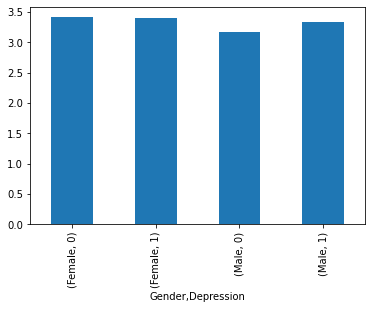

In [105]:
df_bar = df.groupby(['Gender', 'Depression'])['CGPA'].mean()

print(df_bar)

df_bar.plot(kind='bar')

plt.show()

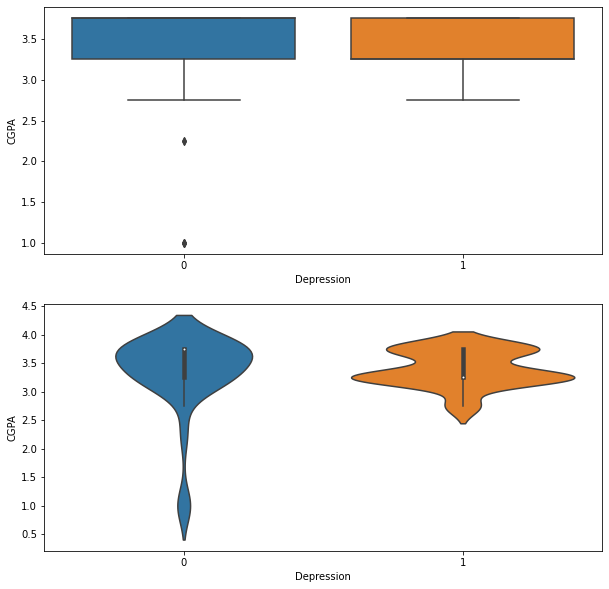

In [99]:
# boxplot, violinplot 그리기

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)


sns.boxplot(x='Depression', y='CGPA', data=df, ax=ax1)
sns.violinplot(x='Depression', y='CGPA', data=df, ax=ax2)

plt.show()

#### 2. Gender 와 GPA 는 관계가 있는가?

*여성이 남성보다 GPA 가 약간 높다*

In [118]:
# pivot table 이용하여 gender 별로 mean, median 구하기

pdf2 = pd.pivot_table(df,
                     index='Gender',
                     values='CGPA',
                     aggfunc=['mean','median'],
                     margins=True).reset_index()

pdf2

,Gender,mean,median
,,CGPA,CGPA
0,Female,3.410000,3.75
1,Male,3.211538,3.25
2,All,3.358911,3.25


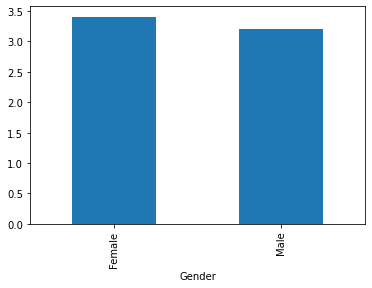

<Figure size 720x720 with 0 Axes>

In [119]:
# bar chart

df_bar2 = df.groupby('Gender')['CGPA'].mean()

df_bar2.plot(kind='bar')

plt.figure(figsize=(10, 10))
plt.show()

### 3. 결혼 유무와 우울증이 관계가 있나

*응답자의 다수가 미혼이여서 절대적 비교는 불가하지만, 응답자 데이터만 놓고 보면 기혼자들의 경우 Depression 과 Panic_attack 비율이 높다..*

In [137]:
df['Marital_status'].value_counts()

0    85
1    16
Name: Marital_status, dtype: int64

In [136]:
# pivot table 로 결혼 유무에 따라 Depression, Anxiety, Panic attack 정도 살피기

pdf3 = pd.pivot_table(df,
                     index='Marital_status',
                     values=['Depression', 'Anxiety', 'Panic_attack'],
                     aggfunc='mean')

pdf3

,Anxiety,Depression,Panic_attack
Marital_status,,,
0,0.317647,0.223529,0.270588
1,0.437500,1.000000,0.625000


### 4. Study year 에 따라 Depression 또는 anxiety, panic_attack 이 다른가

*나의 가설은 '취업을 앞둔 4학년이 우울증이나 불안이 높을 것이다' 였는데, 생각보다 2, 3학년이 높다, 1학년과는 크게 차이가 없다*

In [139]:
df['Current_year'].value_counts()

year 1    43
year 2    26
year 3    24
year 4     8
Name: Current_year, dtype: int64

In [140]:
# 학년별 Depression, Anxiety, Panic_attack

pdf4 = pd.pivot_table(df,
                      index='Current_year',
                      values=['Depression', 'Anxiety', 'Panic_attack'],
                      aggfunc='mean')

pdf4

,Anxiety,Depression,Panic_attack
Current_year,,,
year 1,0.325581,0.325581,0.325581
year 2,0.384615,0.384615,0.307692
year 3,0.333333,0.416667,0.416667
year 4,0.250000,0.125000,0.125000


In [154]:
# 학년별 성별 Depression, Anxiety, Panic_attack

pdf5 = pd.pivot_table(df,
                      index='Current_year',
                      columns='Gender',
                      values=['Depression', 'Anxiety', 'Panic_attack'],
                      aggfunc='mean')

pdf5

Anxiety           Depression           Panic_attack          
Gender          Female      Male     Female      Male       Female      Male
Current_year                                                                
year 1        0.303030  0.400000   0.393939  0.100000     0.303030  0.400000
year 2        0.333333  0.454545   0.400000  0.363636     0.333333  0.272727
year 3        0.350000  0.250000   0.450000  0.250000     0.450000  0.250000
year 4        0.285714  0.000000   0.142857  0.000000     0.142857  0.000000

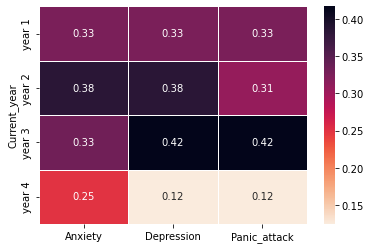

<Figure size 1080x720 with 0 Axes>

In [162]:
# 학년별 Depression, Anxiety, Panic_attack -> heatmap


cmap = sns.cm.rocket_r

sns.heatmap(pdf4, annot=True, linewidth=0.5, cmap=cmap)


plt.figure(figsize=(15, 10))

plt.show()

## Summary